In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from collections import Counter, OrderedDict
%matplotlib inline 
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_colwidth', -1)

def Bar(counter_param, title='', ylabel='', xlabel='', rotation=0):
    
    print(counter_param)
    
    labels = list(counter_param.keys())
    values = list(counter_param.values())
    ind = np.arange(0, len(labels), 1)
    
    fig, ax = plt.subplots(figsize=(18,8))
    
    ax.set_title(title, fontsize=15, fontweight='bold')
    ax.set_ylabel(ylabel , fontsize=15)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

    plt.bar(ind, values)
    
    ax.set_xticks(ind)
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=rotation)
    ax.set_xticklabels(labels[::1])
    plt.show()
    
def Box(values, title='', ylabel='', xlabel=''):
    
    fig, ax = plt.subplots()
    ax.set_title(title, fontsize=15, fontweight='bold')
    ax.xaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    ax.set_ylabel(ylabel, fontsize=15)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)

    ax.boxplot(values)

    plt.show()
    
def Histogram(values, title='', ylabel='', xlabel=''):
    
    fig, ax = plt.subplots()
    ax.set_title('', fontsize=15, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=15)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.hist(values, bins=100, range=(0,max(values)/6), histtype='bar', align='mid', orientation='vertical')
    plt.show()

In [2]:
global_data = pd.read_excel('../GTD/globalterrorismdb_0617dist.xlsx')
print(list(global_data.columns))

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [3]:
us_internal_data = global_data.loc[global_data['country_txt'] == 'United States'].loc[global_data['iyear'] >= 2001]
us_external_data_1 = global_data.loc[global_data['country_txt'] != 'United States'].loc[global_data['iyear'] >= 2001].loc[global_data['natlty1_txt'] == 'United States']
us_external_data_2 = global_data.loc[global_data['country_txt'] != 'United States'].loc[global_data['iyear'] >= 2001].loc[global_data['natlty1_txt'] != 'United States'].loc[global_data['natlty2_txt'] == 'United States']
us_external_data_3 = global_data.loc[global_data['country_txt'] != 'United States'].loc[global_data['iyear'] >= 2001].loc[global_data['natlty1_txt'] != 'United States'].loc[global_data['natlty2_txt'] != 'United States'].loc[global_data['natlty3_txt'] == 'United States']
frames = [us_external_data_1, us_external_data_2, us_external_data_3]
us_external_data = pd.concat(frames)

print('%s global events observed' %len(global_data))
print('%s events observed in the United States' %len(us_internal_data))
print('%s events observed outside the United States' %len(us_external_data))

170350 global events observed
370 events observed in the United States
591 events observed outside the United States


Counter({2014: 16860, 2015: 14852, 2016: 13488, 2013: 11996, 2012: 8500, 2011: 5071, 2010: 4822, 2008: 4803, 2009: 4719, 2007: 3241, 2006: 2749, 2005: 2009, 2002: 1332, 2003: 1262, 2004: 1162})


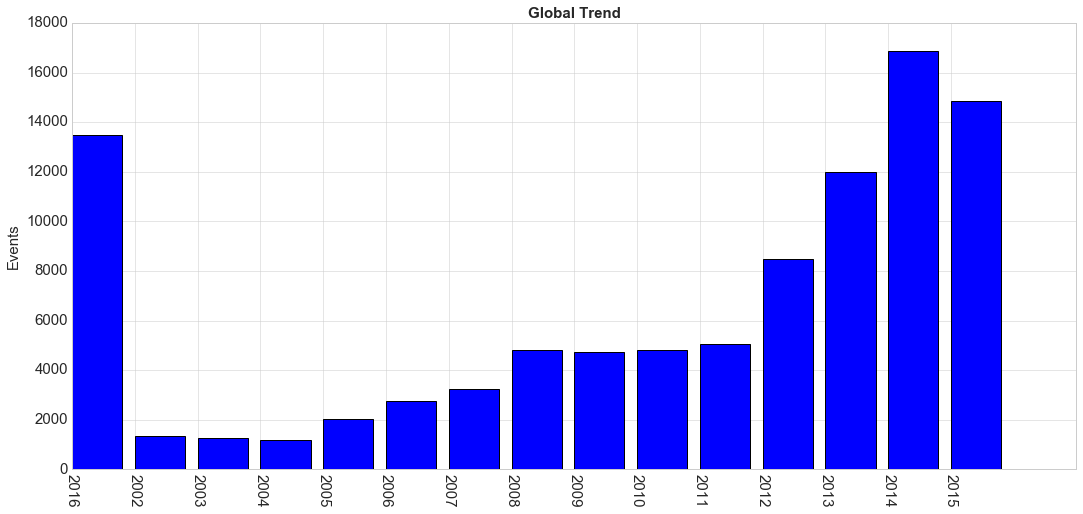

In [4]:
Bar(Counter(global_data.loc[global_data['iyear'] > 2001].iyear), title='Global Trend', ylabel='Events', rotation=270)

Counter({2016: 61, 2001: 41, 2015: 39, 2002: 33, 2003: 32, 2014: 26, 2005: 20, 2013: 20, 2012: 19, 2008: 18, 2010: 17, 2009: 10, 2011: 10, 2004: 9, 2007: 9, 2006: 6})


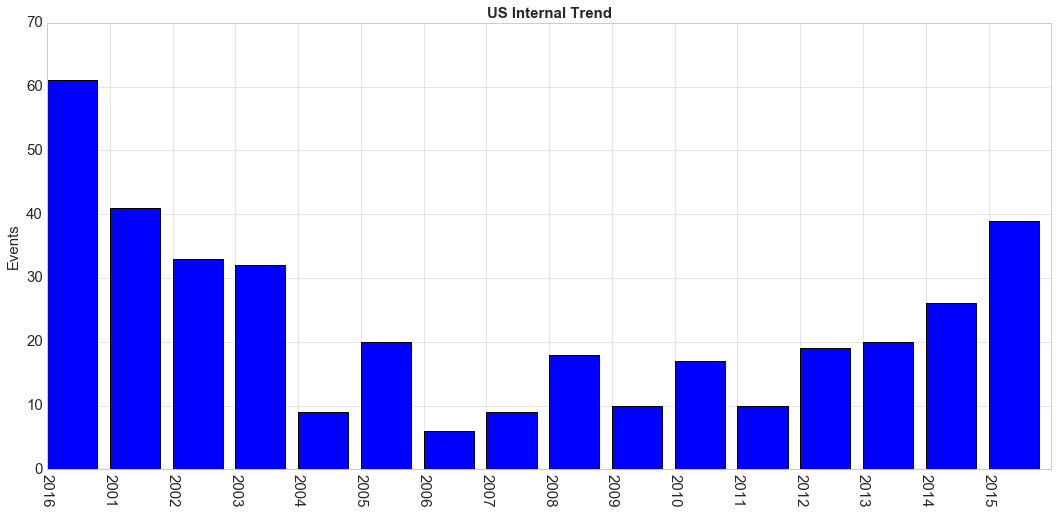

In [5]:
Bar(Counter(us_internal_data.iyear), title='US Internal Trend', ylabel='Events', rotation=270)

Counter({2005: 78, 2004: 72, 2003: 65, 2008: 59, 2002: 39, 2007: 39, 2006: 38, 2001: 28, 2016: 26, 2014: 25, 2012: 23, 2010: 22, 2015: 22, 2009: 20, 2011: 20, 2013: 15})


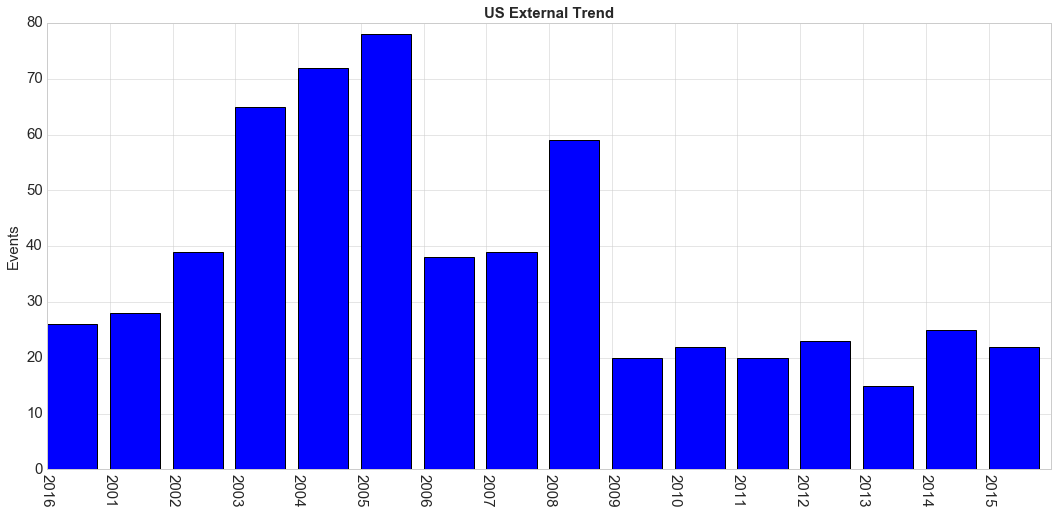

In [6]:
Bar(Counter(us_external_data.iyear), title='US External Trend', ylabel='Events', rotation=270)

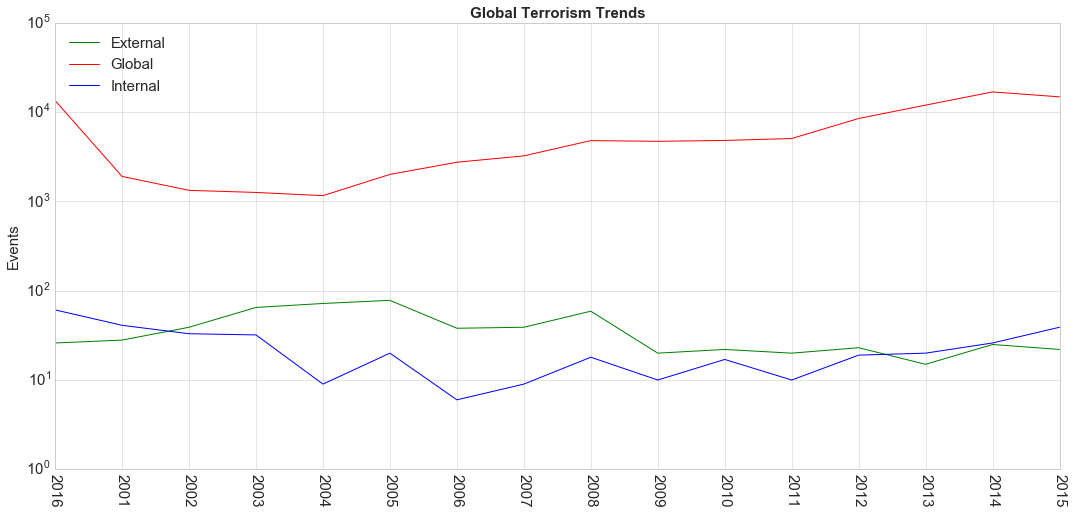

In [7]:
fig, ax = plt.subplots(figsize=(18, 8))

labels = list(Counter(us_external_data.iyear).keys())

ind = np.arange(0, len(labels), 1)

ax.set_title('Global Terrorism Trends', fontsize=15, fontweight='bold')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('Events' , fontsize=15)

ax.set_xticks(np.arange(0, len(labels), 1))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
ax.set_xticklabels(labels[::1])
ax.set_yscale('log')
plt.plot(ind, list(Counter(us_external_data.iyear).values()), label='External', c='g')
plt.plot(ind, list(Counter(global_data.loc[global_data['iyear'] >=2001].iyear).values()), label='Global', c='r')
plt.plot(ind, list(Counter(us_internal_data.iyear).values()), label='Internal')
plt.legend(loc='best', fontsize=15)
plt.show()

In [8]:
print('US Internal / Global Attacks: {}'.format(stats.spearmanr(list(Counter(us_internal_data.iyear).values()), list(Counter(global_data.loc[global_data['iyear'] >= 2001].iyear).values()))))
print('US External / Global Attacks: {}'.format(stats.spearmanr(list(Counter(us_external_data.iyear).values()), list(Counter(global_data.loc[global_data['iyear'] >= 2001].iyear).values()))))
print('US External / US Internal: {}'.format(stats.spearmanr(list(Counter(us_internal_data.iyear).values()), list(Counter(us_external_data.iyear).values()))))

US Internal / Global Attacks: SpearmanrResult(correlation=0.23139334365020084, pvalue=0.3885312878524243)
US External / Global Attacks: SpearmanrResult(correlation=-0.69565387390378852, pvalue=0.0027675398043765973)
US External / US Internal: SpearmanrResult(correlation=-0.027326440177252588, pvalue=0.9199815614747453)


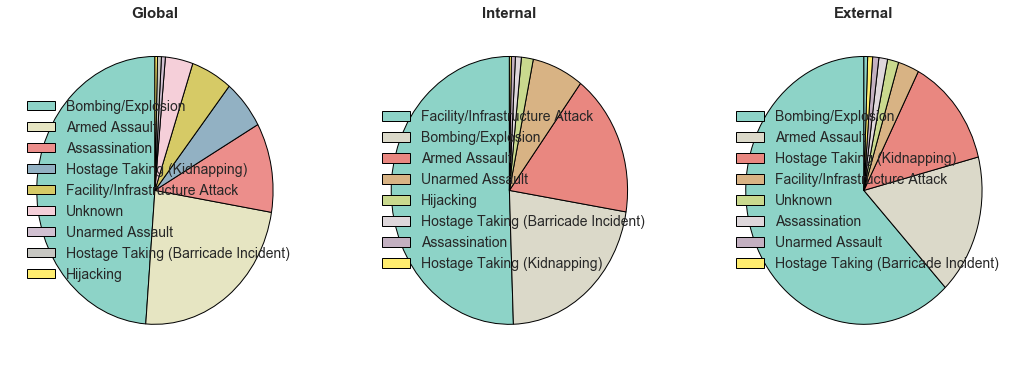

In [9]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))

labels1= list(OrderedDict(sorted(Counter(global_data.attacktype1_txt).items(), key=lambda x: x[1], reverse=True)).keys())
sizes1 = list(OrderedDict(sorted(Counter(global_data.attacktype1_txt).items(), key=lambda x: x[1], reverse=True)).values())

patches1, texts1 = ax1.pie(sizes1, colors=cm.Set3(np.linspace(0, 1, len(sizes1))), startangle=90)
ax1.legend(patches1, labels1, loc="right", fontsize=14)
ax1.set_title('Global', fontsize=15, fontweight='bold')

labels2= list(OrderedDict(sorted(Counter(us_internal_data.attacktype1_txt).items(), key=lambda x: x[1], reverse=True)).keys())
sizes2 = list(OrderedDict(sorted(Counter(us_internal_data.attacktype1_txt).items(), key=lambda x: x[1], reverse=True)).values())

patches2, texts2 = ax2.pie(sizes2, colors=cm.Set3(np.linspace(0, 1, len(sizes2))), startangle=90)
ax2.legend(patches2, labels2, loc="right", fontsize=14)
ax2.set_title('Internal', fontsize=15, fontweight='bold')

labels3= list(OrderedDict(sorted(Counter(us_external_data.attacktype1_txt).items(), key=lambda x: x[1], reverse=True)).keys())
sizes3 = list(OrderedDict(sorted(Counter(us_external_data.attacktype1_txt).items(), key=lambda x: x[1], reverse=True)).values())

patches3, texts3 = ax3.pie(sizes3, colors=cm.Set3(np.linspace(0, 1, len(sizes2))), startangle=90)
ax3.legend(patches2, labels3, loc="right", fontsize=14)
ax3.set_title('External', fontsize=15, fontweight='bold')